In [3]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.

#Para realizar los graficos en la misma linea de codigo.
%matplotlib inline  

In [4]:
#Función para operaciones con matrices.
def apply_matrix(img, M):
        return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

(375, 600, 3)


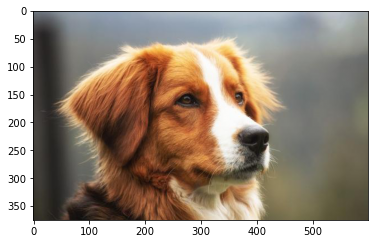

In [5]:
#Cargo una imagen
img_rgb = imageio.imread('ejemplo.png')/255
#Mostrar imagen
plt.imshow(img_rgb)

print(img_rgb.shape) #Tamaño de la imagen y capas

#print(img_rgb) #IMG como matriz
#print(img_rgb[:,:,1]) #IMG como matriz solo capa 1
#print(img_rgb[0:10,0:10,1]) #Solo un sector y solo capa 1

#type(img_rgb.dtype) #UINT-8 (0-255)

# Seleccionar solo el canal rojo

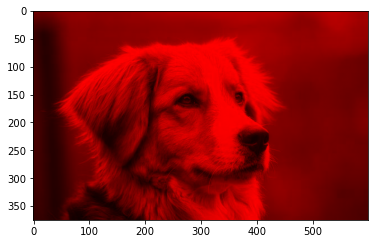

In [6]:
#Creo una matriz de transformación.
M = np.array([[1,0,0],
              [0,0,0],
              [0,0,0]])

img_red = apply_matrix(img_rgb, M)

plt.imshow(img_red)

#print(img_red)

# Imágen en escala de grises

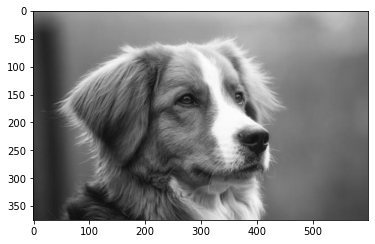

In [145]:
# Matriz de transformación de unos (1/3 en realidad)
M = np.ones((3,3))/3
#print(M)

img_gray = apply_matrix(img_rgb, M)

plt.imshow(img_gray)
#type(img_gray.dtype)

#print(img_gray[10:100,10:100,1])

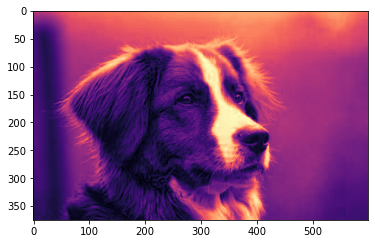

In [150]:
plt.imshow(img_rgb[:,:,0],'gray') #Ver ch1, ch2, ch3
plt.imshow(img_rgb[:,:,2],'magma')

0.9986928104575163

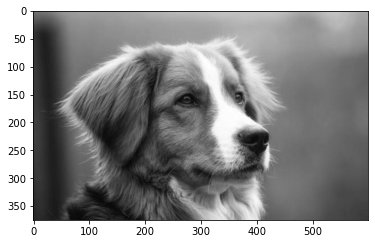

In [149]:
img_gray_red = img_gray[:,:,0]
#plt.imshow(img_gray_red)   #Si no le pongo gray usa otra paleta de colores (cree q es RGB)
#
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
#

plt.imshow(img_gray_red,'gray')
#print(img_gray_red.shape)
img_gray.min()
img_gray.max()



array([[250, 250, 250, ..., 126, 126, 126],
       [250, 250, 250, ..., 126, 126, 126],
       [250, 250, 250, ..., 126, 126, 126],
       ...,
       [233, 235, 234, ..., 114, 115, 115],
       [235, 235, 234, ..., 114, 115, 115],
       [233, 229, 232, ..., 115, 116, 116]])

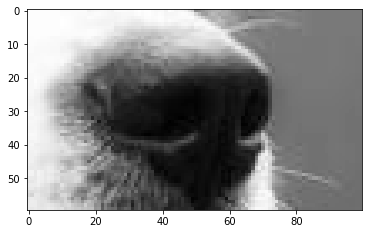

In [147]:
sector = img_gray_red[200:260,350:450]*255          #Selecciono la NARIZ
plt.imshow(sector, 'gray')
#plt.imshow(sector, 'gray',vmin = 100, vmax = 255)
sector.astype(int) #Para convertir a int

# Otros mapas de colores (Matriz Aleatoria)

[[0.32064819 0.27676321 0.00153577]
 [0.29233783 0.23908467 0.04254283]
 [0.00097687 0.17795648 0.07511074]]


Text(0.5, 1.0, 'Imagen Original')

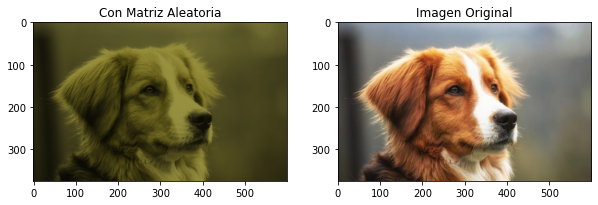

In [181]:
M = np.random.rand(3,3)/3
print(M)
img_random = apply_matrix(img_rgb, M)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_random, 0, 1))
axes[0].set_title('Con Matriz Aleatoria')
axes[1].imshow(np.clip(img_rgb, 0, 1))
axes[1].set_title('Imagen Original')


[[ -3.91158739   7.72544483  -4.29572408]
 [  8.25324912  -9.069105     4.96800244]
 [-19.50317779  21.38654616   1.59908097]]


Text(0.5, 1.0, 'Imagen Original')

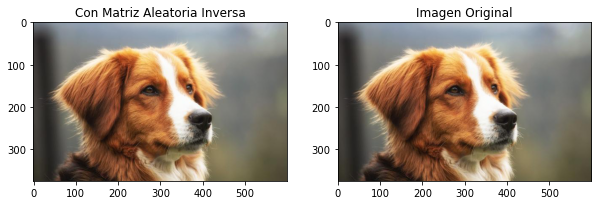

In [184]:
M_inv = np.linalg.inv(M)
print(M_inv)
img_random_inv = apply_matrix(img_random, M_inv)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_random_inv, 0, 1))
axes[0].set_title('Con Matriz Aleatoria Inversa')
axes[1].imshow(np.clip(img_rgb, 0, 1))
axes[1].set_title('Imagen Original')


# Operaciones en el espacio YIQ
### Espacio de color que utiliza el estandar NTSC de TV para transmitir la señal. 
### Y: Luminescence: brightness information.
### I: Phase: Orange and Cyan information.
### Q: Quadrature: Green and Magenta Information.
### IQ defines chrominance

Text(0.5, 1.0, 'Imagen Original')

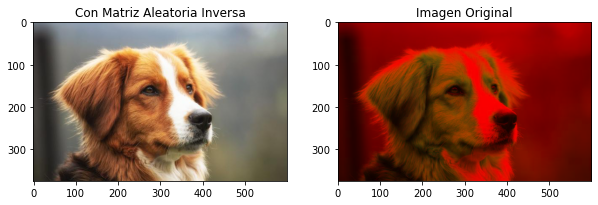

In [198]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

rgb_yiq = apply_matrix(img_rgb, M_YIQ)
yiq_rgb = apply_matrix(rgb_yiq, M_RGB)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title('Con Matriz Aleatoria Inversa')
axes[1].imshow(np.clip(rgb_yiq, 0, 1))
axes[1].set_title('Imagen Original')

#Cada canal...
#plt.imshow(rgb_yiq[:,:,2],'gray')


[[0.47190196 0.47190196 0.47582353 ... 0.67435686 0.67435686 0.67435686]
 [0.46405882 0.46405882 0.46798039 ... 0.67435686 0.67435686 0.67435686]
 [0.45621569 0.45621569 0.45621569 ... 0.67043529 0.67043529 0.67043529]
 ...
 [0.18078039 0.18078039 0.18078039 ... 0.26290588 0.26290588 0.26290588]
 [0.17685882 0.18078039 0.18078039 ... 0.26290588 0.26290588 0.25898431]
 [0.17685882 0.17685882 0.18078039 ... 0.26290588 0.25898431 0.25898431]]


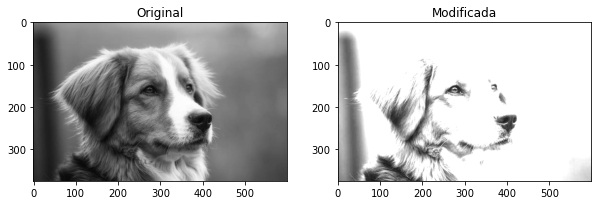

In [225]:
y_channel = rgb_yiq[:,:,0] 
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(y_channel, 0, 1),'gray')
axes[0].set_title('Original')
axes[1].imshow(np.clip(y_channel*3, 0, 1),'gray')
axes[1].set_title('Modificada')
print(y_channel)

# ACTIVIDAD PRACTICA 1

## 1) Obtener los 3 canales RGB de una imágen, indicando cómo es la matriz en cada caso.
## 2) Intercambiar los canales de una imágen (R-->G, G-->B, B-->R)
## 3) Convertir una imagen RGB a YIQ
###      a) Modificar los canales YIQ.
###      b) Volver a convertir la imagen a RGB.
